# Graph Learning Notebook

This notebook demonstrates:

1. Spectral clustering
2. Laplace learning
3. Poisson learning
4. Uncertainty quantification
5. Active learning

In [13]:
pip install graphlearning

In [31]:
import numpy as np
import graphlearning as gl
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import graphlearning.active_learning as al


## Spectral Clustering on Two Moons (from the graphlearning examples)

Clustering Accuracy: 91.80%


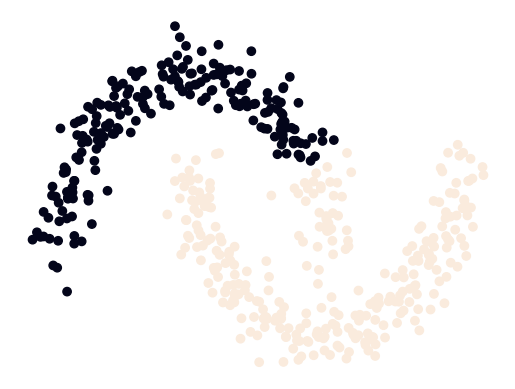

In [6]:
X,labels = datasets.make_moons(n_samples=500,noise=0.1)
W = gl.weightmatrix.knn(X,10)

model = gl.clustering.spectral(W, num_clusters=2)
pred_labels = model.fit_predict()

accuracy = gl.clustering.clustering_accuracy(pred_labels, labels)
print('Clustering Accuracy: %.2f%%'%accuracy)

plt.scatter(X[:,0],X[:,1], c=pred_labels)
plt.axis('off')
plt.show()


In the next cell, we change the number of neighbors in the knn graph

Clustering Accuracy: 100.00%


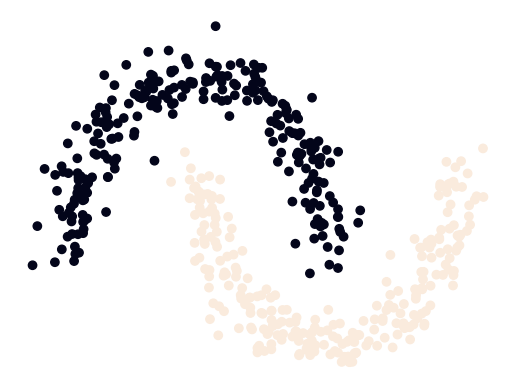

In [7]:
X,labels = datasets.make_moons(n_samples=500,noise=0.1)
W = gl.weightmatrix.knn(X,30)

model = gl.clustering.spectral(W, num_clusters=2)
pred_labels = model.fit_predict()

accuracy = gl.clustering.clustering_accuracy(pred_labels, labels)
print('Clustering Accuracy: %.2f%%'%accuracy)

plt.scatter(X[:,0],X[:,1], c=pred_labels)
plt.axis('off')
plt.show()


## Spectral Clustering on MNIST (from the graphlearning examples)

In [14]:
W = gl.weightmatrix.knn('mnist', 10, metric='vae')
labels = gl.datasets.load('mnist', labels_only=True)

model = gl.clustering.spectral(W, num_clusters=10, extra_dim=4)
pred_labels = model.fit_predict(all_labels=labels)

accuracy = gl.clustering.clustering_accuracy(pred_labels,labels)
print('Clustering Accuracy: %.2f%%'%accuracy)

Clustering Accuracy: 95.99%


In [15]:
W = gl.weightmatrix.knn('mnist', 30, metric='vae')
labels = gl.datasets.load('mnist', labels_only=True)

model = gl.clustering.spectral(W, num_clusters=10, extra_dim=4)
pred_labels = model.fit_predict(all_labels=labels)

accuracy = gl.clustering.clustering_accuracy(pred_labels,labels)
print('Clustering Accuracy: %.2f%%'%accuracy)

Clustering Accuracy: 95.32%


## Laplace Learning on Two Moons (from the graphlearning examples)

Accuracy: 98.57%


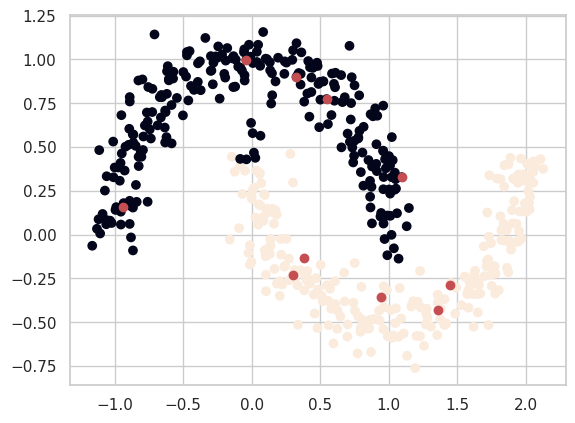

In [12]:
X,labels = datasets.make_moons(n_samples=500,noise=0.1)
W = gl.weightmatrix.knn(X,10)

train_ind = gl.trainsets.generate(labels, rate=5)
train_labels = labels[train_ind]

model = gl.ssl.laplace(W)
pred_labels = model.fit_predict(train_ind, train_labels)

accuracy = gl.ssl.ssl_accuracy(pred_labels, labels, train_ind)
print("Accuracy: %.2f%%"%accuracy)

plt.scatter(X[:,0],X[:,1], c=pred_labels)
plt.scatter(X[train_ind,0],X[train_ind,1], c='r')
plt.show()

We change the k in the knn graph

Accuracy: 76.94%


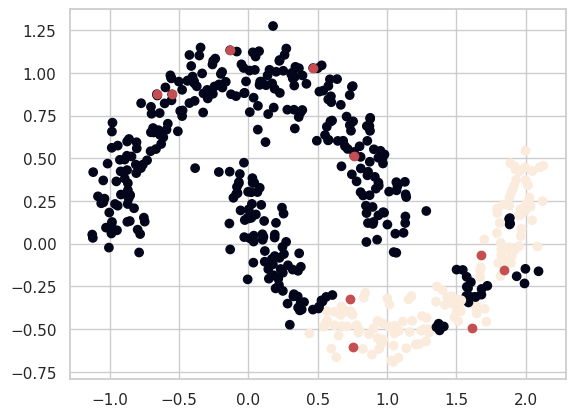

In [16]:
X,labels = datasets.make_moons(n_samples=500,noise=0.1)
W = gl.weightmatrix.knn(X,2)

train_ind = gl.trainsets.generate(labels, rate=5)
train_labels = labels[train_ind]

model = gl.ssl.laplace(W)
pred_labels = model.fit_predict(train_ind, train_labels)

accuracy = gl.ssl.ssl_accuracy(pred_labels, labels, train_ind)
print("Accuracy: %.2f%%"%accuracy)

plt.scatter(X[:,0],X[:,1], c=pred_labels)
plt.scatter(X[train_ind,0],X[train_ind,1], c='r')
plt.show()

We change the knn graph to an epsilon graph with eps = 0.1

Accuracy: 97.35%


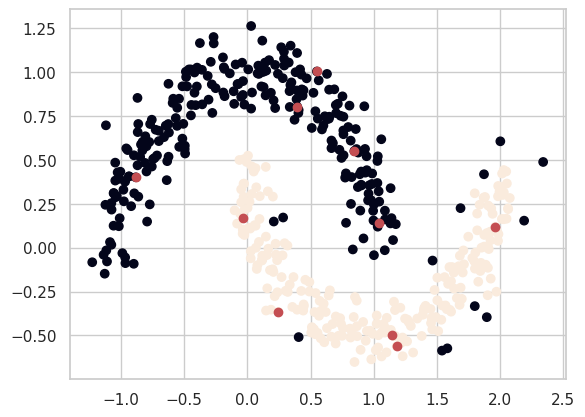

In [17]:
X,labels = datasets.make_moons(n_samples=500,noise=0.1)
W = gl.weightmatrix.epsilon_ball(X,0.1)

train_ind = gl.trainsets.generate(labels, rate=5)
train_labels = labels[train_ind]

model = gl.ssl.laplace(W)
pred_labels = model.fit_predict(train_ind, train_labels)

accuracy = gl.ssl.ssl_accuracy(pred_labels, labels, train_ind)
print("Accuracy: %.2f%%"%accuracy)

plt.scatter(X[:,0],X[:,1], c=pred_labels)
plt.scatter(X[train_ind,0],X[train_ind,1], c='r')
plt.show()

We change the value of eps

Accuracy: 81.63%


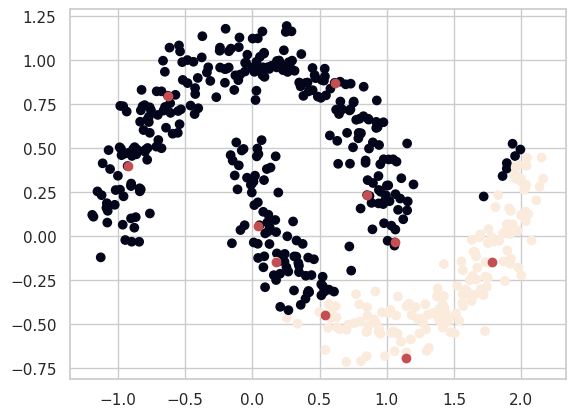

In [18]:
X,labels = datasets.make_moons(n_samples=500,noise=0.1)
W = gl.weightmatrix.epsilon_ball(X,2)

train_ind = gl.trainsets.generate(labels, rate=5)
train_labels = labels[train_ind]

model = gl.ssl.laplace(W)
pred_labels = model.fit_predict(train_ind, train_labels)

accuracy = gl.ssl.ssl_accuracy(pred_labels, labels, train_ind)
print("Accuracy: %.2f%%"%accuracy)

plt.scatter(X[:,0],X[:,1], c=pred_labels)
plt.scatter(X[train_ind,0],X[train_ind,1], c='r')
plt.show()

## Poisson learning (from the graphlearning examples)


Model: Graph NN (alpha=1.00)

Number of labels,Accuracy
10,74.51
20,75.95
30,79.52
40,85.39
50,87.02

Model: Laplace Learning

Number of labels,Accuracy
10,11.12
20,33.02
30,70.78
40,60.33
50,80.57

Model: Laplace Learning: wnll reweighted

Number of labels,Accuracy
10,73.61
20,94.86
30,89.46
40,96.43
50,96.29

Model: Laplace Learning: poisson reweighted

Number of labels,Accuracy
10,94.94
20,95.56
30,94.91
40,95.83
50,96.53

Model: Poisson Learning

Number of labels,Accuracy
10,95.45
20,95.91
30,95.55
40,96.25
50,96.69


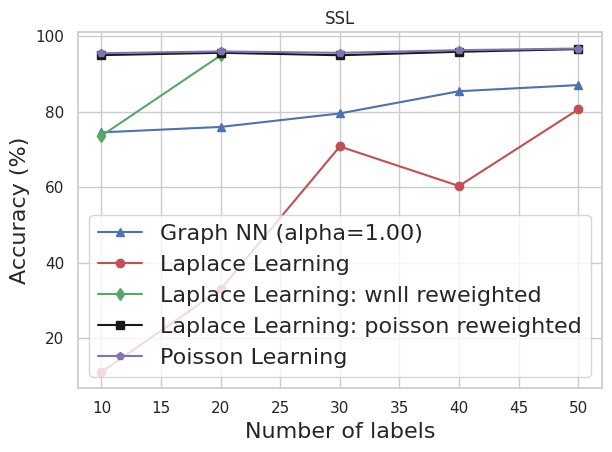

In [23]:
dataset = 'mnist'
metric = 'vae'
k = 10

W = gl.weightmatrix.knn(dataset, k, metric=metric)
D = gl.weightmatrix.knn(dataset, k, metric=metric, kernel='distance')

labels = gl.datasets.load(dataset, metric=metric, labels_only=True)
trainsets = gl.trainsets.load(dataset)

model_list = [gl.ssl.graph_nearest_neighbor(D),
              gl.ssl.laplace(W),
              gl.ssl.laplace(W, reweighting='wnll'),
              gl.ssl.laplace(W, reweighting='poisson'),
              gl.ssl.poisson(W, solver='gradient_descent')]

for model in model_list:
    model.ssl_trials(trainsets, labels, num_trials = 5,save_results = False)

gl.ssl.accuracy_plot(model_list, title='SSL')

## Uncertainty quantification

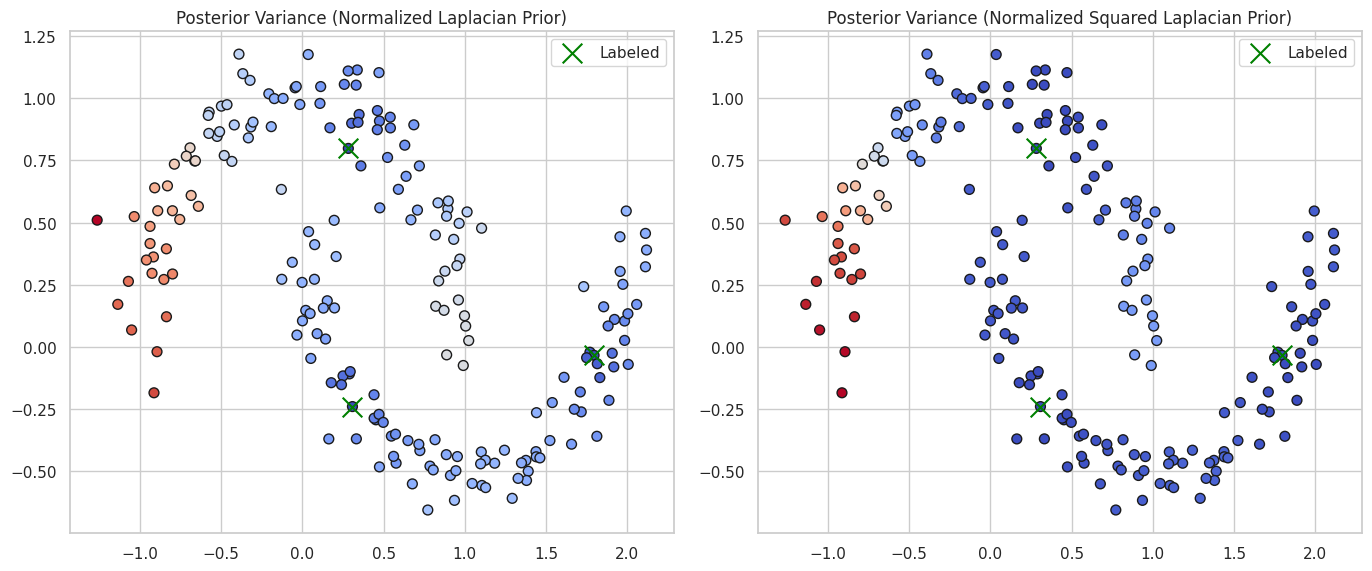

In [29]:
# --- Generate two moons data ---
X, y = datasets.make_moons(n_samples=200, noise=0.1)
W = gl.weightmatrix.knn(X, 10)
G = gl.graph(W)
L = G.laplacian().toarray()
n = L.shape[0]
tau = 1e-5

# --- Labels ---
labeled_indices = np.array([0, 20,100])
unlabeled_indices = np.setdiff1d(np.arange(n), labeled_indices)

# --- Function to normalize Q so prior variances are 1 ---
def normalize_precision(Q):
    Sigma = np.linalg.inv(Q)
    prior_var = np.diag(Sigma)
    D_inv_sqrt = 1.0 / np.sqrt(prior_var)
    D_mat = np.diag(D_inv_sqrt)
    Q_normalized = D_mat @ Q @ D_mat
    return Q_normalized

# --- Posterior variance function ---
def compute_posterior_variance(Q, labeled, unlabeled):
    Q_uu = Q[np.ix_(unlabeled, unlabeled)]
    posterior_cov = np.linalg.inv(Q_uu)
    variance = np.zeros(Q.shape[0])
    variance[unlabeled] = np.diag(posterior_cov)
    return variance

# --- Prior 1: Normalized Laplacian ---
Q_lap = L + tau * np.eye(n)
Q_lap = normalize_precision(Q_lap)
var_lap = compute_posterior_variance(Q_lap, labeled_indices, unlabeled_indices)

# --- Prior 2: Normalized Squared Laplacian ---
Q_lap2 = L @ L + tau * np.eye(n)
Q_lap2 = normalize_precision(Q_lap2)
var_lap2 = compute_posterior_variance(Q_lap2, labeled_indices, unlabeled_indices)

# --- Plotting ---
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


sc1 = axs[0].scatter(X[:, 0], X[:, 1], c=var_lap, cmap="coolwarm", s=50, edgecolor='k')
axs[0].scatter(X[labeled_indices, 0], X[labeled_indices, 1], color='green',marker = "x", label='Labeled', s=200)
axs[0].set_title("Posterior Variance (Normalized Laplacian Prior)")
axs[0].legend()


sc2 = axs[1].scatter(X[:, 0], X[:, 1], c=var_lap2, cmap="coolwarm", s=50, edgecolor='k')
axs[1].scatter(X[labeled_indices, 0], X[labeled_indices, 1], color='green', marker = "x", label='Labeled', s=200)
axs[1].set_title("Posterior Variance (Normalized Squared Laplacian Prior)")
axs[1].legend()


plt.tight_layout()
plt.show()

## Active learning

Initial labeled indices: [483 172]


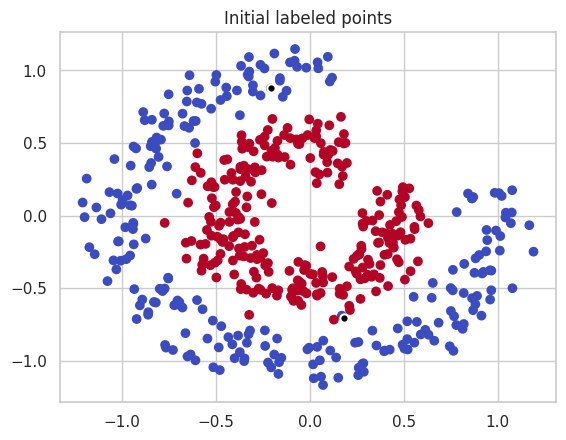

Step 1 - SSL Accuracy: 50.099


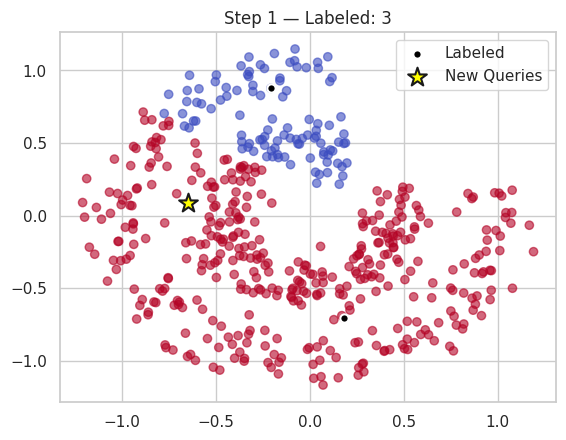

Step 2 - SSL Accuracy: 53.479


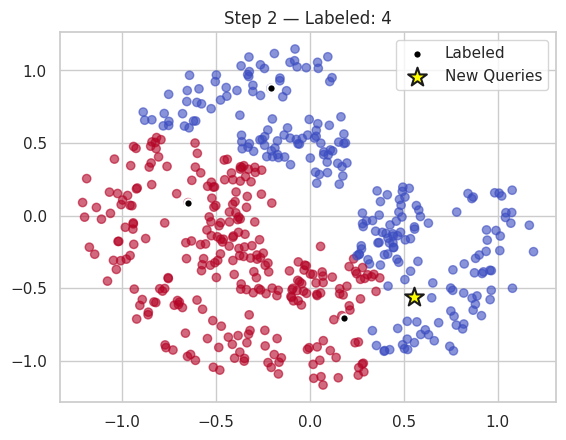

Step 3 - SSL Accuracy: 63.419


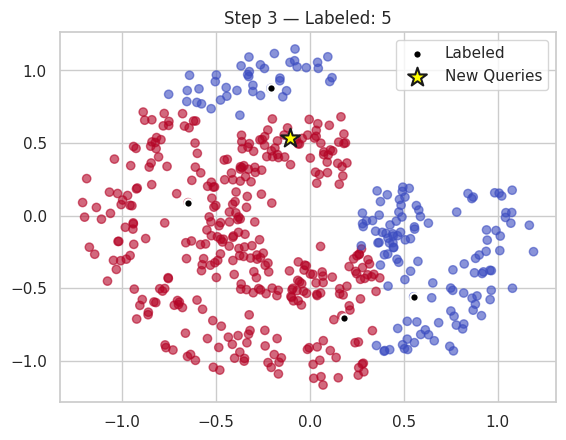

Step 4 - SSL Accuracy: 81.511


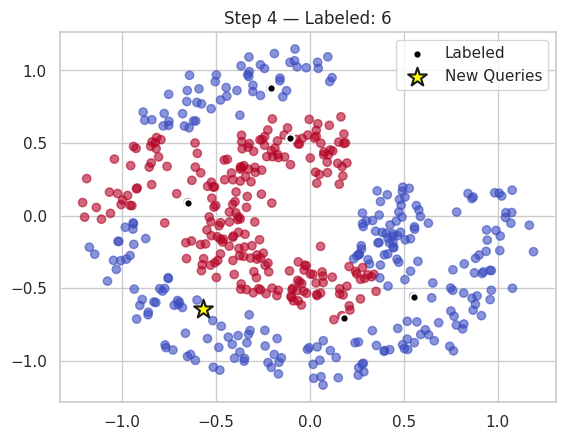

Step 5 - SSL Accuracy: 90.258


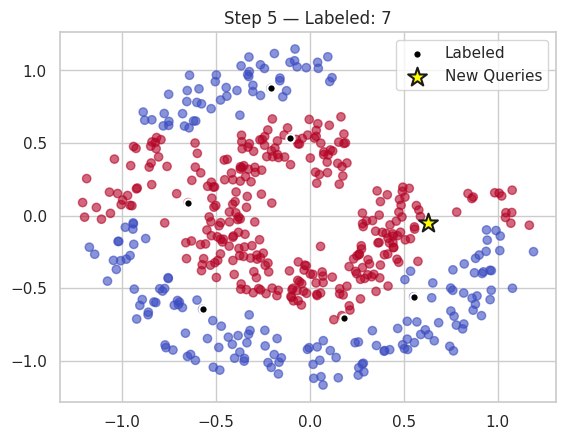

Step 6 - SSL Accuracy: 96.223


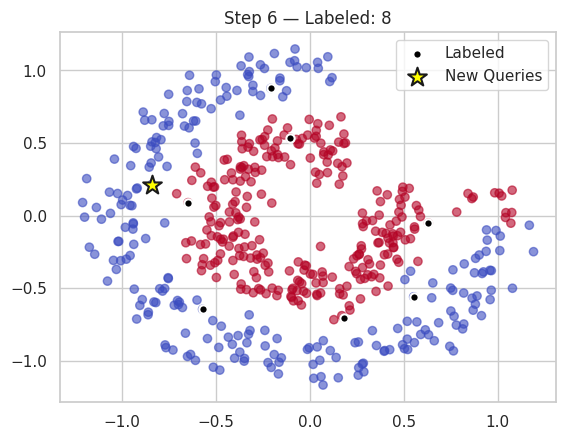

Step 7 - SSL Accuracy: 97.018


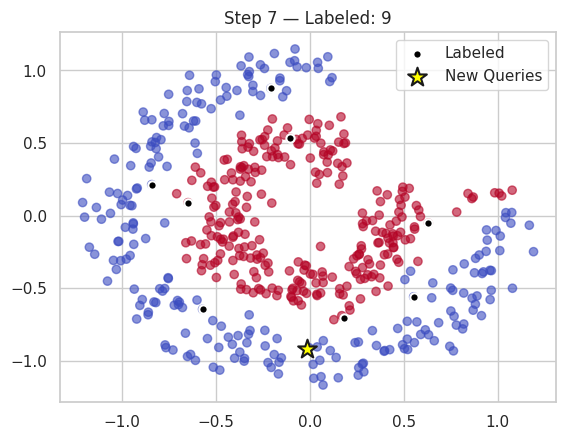

Step 8 - SSL Accuracy: 97.018


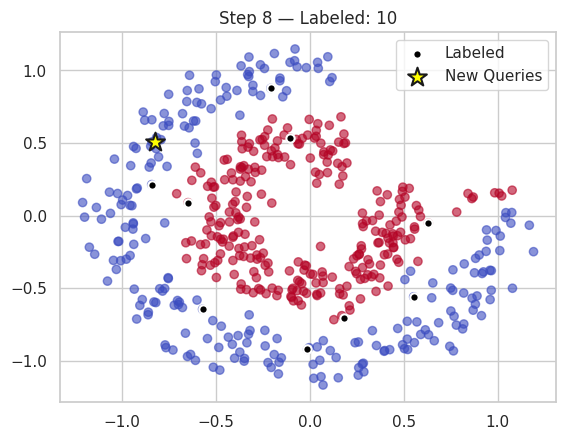

Step 9 - SSL Accuracy: 98.410


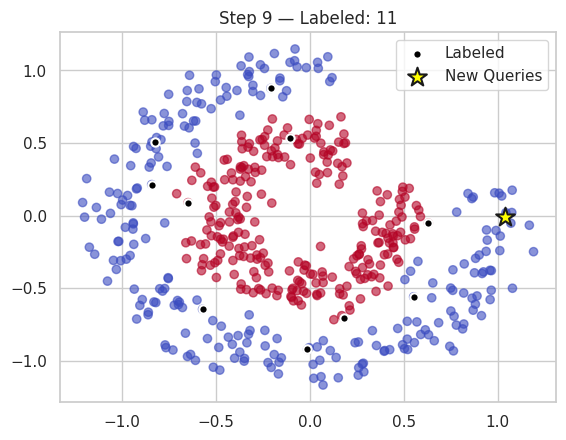

Step 10 - SSL Accuracy: 98.410


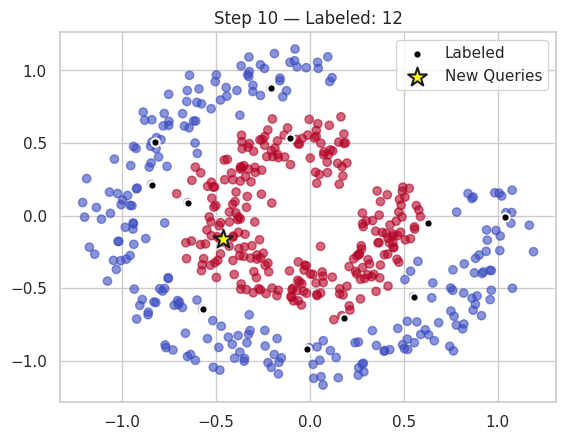

In [32]:
X, y = datasets.make_circles(n_samples=600, factor=0.5, noise=0.1)
# Remove points to create gaps or imbalance
mask = ~((X[:,0] > 0.2) & (X[:,1] > 0.2))
X, labels = X[mask], y[mask]

# --- Step 2: Build Graph ---
W = gl.weightmatrix.knn(X, 10)

# --- Step 3: Select 1 labeled point from each class ---
train_ind = gl.trainsets.generate(labels, rate=1)
print("Initial labeled indices:", train_ind)

# --- Step 4: Plot initial setup ---
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='coolwarm')
plt.scatter(X[train_ind, 0], X[train_ind, 1], c='black', edgecolors='white', linewidths=1.5)
plt.title("Initial labeled points")
plt.show()

# --- Step 5: Initialize Laplace model and spectral info ---
model = gl.ssl.laplace(W)
evals, evecs = model.graph.eigen_decomp(normalization='normalized', k=10)
C = np.diag(1. / (evals + 1e-11))  # Prior covariance matrix

# --- Step 6: Setup Active Learner ---
AL = gl.active_learning.active_learner(
    model,
    gl.active_learning.var_opt,
    train_ind,
    labels[train_ind],
    C=C.copy(),
    V=evecs.copy()
)

# --- Step 7: Active Learning Loop ---
for i in range(10):
    query_points = AL.select_queries()
    query_labels = labels[query_points]  # Simulate label oracle
    AL.update(query_points, query_labels)

    # Predict
    labels_pred = AL.model.fit_predict(AL.labeled_ind, AL.labels)
    acc = gl.ssl.ssl_accuracy(labels_pred, labels, train_ind)
    print(f"Step {i+1} - SSL Accuracy: {acc:.3f}")

    # Plot
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=labels_pred, cmap='coolwarm', alpha=0.6)
    plt.scatter(X[AL.labeled_ind, 0], X[AL.labeled_ind, 1], c='black', label="Labeled", edgecolors='white', linewidths=1.5)
    plt.scatter(X[query_points, 0], X[query_points, 1], c='yellow', marker='*', s=200, edgecolors='k', linewidths=1.5, label="New Queries")
    plt.title(f"Step {i+1} — Labeled: {len(AL.labeled_ind)}")
    plt.legend()
    plt.show()